# pip install pandas
# pip install geopy
# pip install pyephem
# pip install matplotlib

In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
#import enphasev2 as e # change to v4 on 10/1/2023
import enphasev4 as e # change to v4 on 10/1/2023
import matplotlib.pyplot as pyplot
import numpy as np
import pprint
from calendar import isleap
import json

In [2]:
e.print_environ()
pp = pprint.PrettyPrinter(indent=3)
a_few_days_ago = e.today() - timedelta(days=5)
not_long_ago = e.today() - timedelta(days=30)
current_summer_solstice = date(e.today().year,6,21)
days = 366 if isleap(current_summer_solstice.year) else 365

ENPHASE_SYSTEM_ID: 1779982
ENPHASE_STATS_PATH: /Users/electronhead/dev/data/enphasev4/stats/
ENPHASE_API_VERSION: v4
ENPHASE_API_KEY: d8f9245256abdb595a59b160bb27ba0b
ENPHASE_CLIENT_ID bd8cd4891bb8a1065103897d833b7f8a
ENPHASE_CLIENT_SECRET 4aa5b2b4a5c9c6049743b965f09d2f04
ENPHASE_ENCODED_CLIENT_SECRET YmQ4Y2Q0ODkxYmI4YTEwNjUxMDM4OTdkODMzYjdmOGE6NGFhNWIyYjRhNWM5YzYwNDk3NDNiOTY1ZjA5ZDJmMDQ=
ENPHASE_REDIRECT_URI https://api.enphaseenergy.com/oauth/redirect_uri


In [3]:
access_token = e.request_access_token()
#print(e.request_summary(access_token).json())
#print(f"access token: {access_token}")
if access_token:
    print(e.save_to_files(access_token, complete_days=False))#, start_date=a_few_days_ago))
else:
    raise Exception("Terminating execution: access token exception")

SUCCESS: 110 rows written to  /Users/electronhead/dev/data/enphasev4/stats/stats_2025-02-08.csv
SUCCESS: 110 rows written to  /Users/electronhead/dev/data/enphasev4/stats/stats_2025-02-09.csv
SUCCESS: 50 rows written to  /Users/electronhead/dev/data/enphasev4/stats/stats_2025-02-10.csv

{'dates_processed': 3, 'last_date_processed': datetime.date(2025, 2, 10)}


In [4]:
data = e.compute_data_frame()
e.augment_data_frame(data)
# data_copy = data.copy()
# data15 = e.compute_data_frame(increment=15)
# data30 = e.compute_data_frame(increment=30)
data60 = e.compute_data_frame(increment=60)

In [5]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(7,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(7,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago, e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 10: # SUM RECENT WATT HOURS minus ONE YEAR
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago-timedelta(days), e.today()-timedelta(days))
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        #date1 = date(2023,7,22)
        #date2 = date(2023,8,22)
        #date1 = date(2023,8,23)
        #date2 = date(2023,9,21)
        #date1 = date(2023,9,22)
        #date2 = date(2023,10,21)
        #date1 = date(2023,10,22)
        #date2 = date(2023,11,20)
        #date1 = date(2023,11,21)
        #date2 = date(2023,12,21)
        #date1 = date(2023,12,22)
        #date2 = date(2024,1,24)
        #date1 = date(2024,1,25)
        #date2 = date(2024,2,22)
        #date1 = date(2024,2,23)
        #date2 = date(2024,3,22)
        #date1 = date(2024,3,23)
        #date2 = date(2024,4,22)
        #date1 = date(2024,4,23)
        #date2 = date(2024,5,21)
        #date1 = date(2024,5,22)
        #date2 = date(2024,6,20)
        #date1 = date(2024,6,21)
        #date2 = date(2024,7,22)
        #date1 = date(2024,7,23)
        #date2 = date(2024,8,21)
        #date1 = date(2024,8,22)
        #date2 = date(2024,9,20)
        #date1 = date(2024,9,21)
        #date2 = date(2024,10,21)
        #date1 = date(2024,10,22)
        #date2 = date(2024,11,19)
        #date1 = date(2024,11,20)
        #date2 = date(2024,12,20)
        date1 = date(2024,12,21)
        date2 = date(2025,1,23)
        glee = e.by_date(data, date1, date2)[e.wh].sum()
        print(f"{glee/1000} kWh for prior PGE billing period ({date1} through {date2})\n")
    elif flea == 11: # 31_day rolling aggregation -- sum, min, mean, max
        wh = e.by_date(data[[e.d,e.wh]], e.pge_online_date(), e.today())
        grouped = wh.groupby([e.d]).sum()
        rolling = grouped.rolling(31).agg([np.sum])
        print_glee(rolling)
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.min])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.mean])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.max])
        rolling.plot(figsize=(15,8),grid=True)
        print_glee(rolling)
    elif flea == 12:
        print(f"time of day = {datetime.now()}\n")
        

+++++++++++++++++
flea: 12
+++++++++++++++++
time of day = 2025-02-10 11:36:00.644872

+++++++++++++++++
flea: 9
+++++++++++++++++
143.611 kWh for prior PGE billing period (2024-12-21 through 2025-01-23)

+++++++++++++++++
flea: 4
+++++++++++++++++
            watt_hours
date                  
2025-01-11        4600
2025-01-12        4139
2025-01-13        3227
2025-01-14        5403
2025-01-15        5871
2025-01-16        2385
2025-01-17        3358
2025-01-18        6569
2025-01-19        6939
2025-01-20        7757
2025-01-21        7282
2025-01-22        7643
2025-01-23        7377
2025-01-24        8120
2025-01-25        8500
2025-01-26        8697
2025-01-27        9022
2025-01-28        9537
2025-01-29        9626
2025-01-30        4328
2025-01-31        2673
2025-02-01        7890
2025-02-02        6536
2025-02-03        5726
2025-02-04        9119
2025-02-05        5526
2025-02-06        8107
2025-02-07        8898
2025-02-08        4139
2025-02-09        5939
2025-02-10     

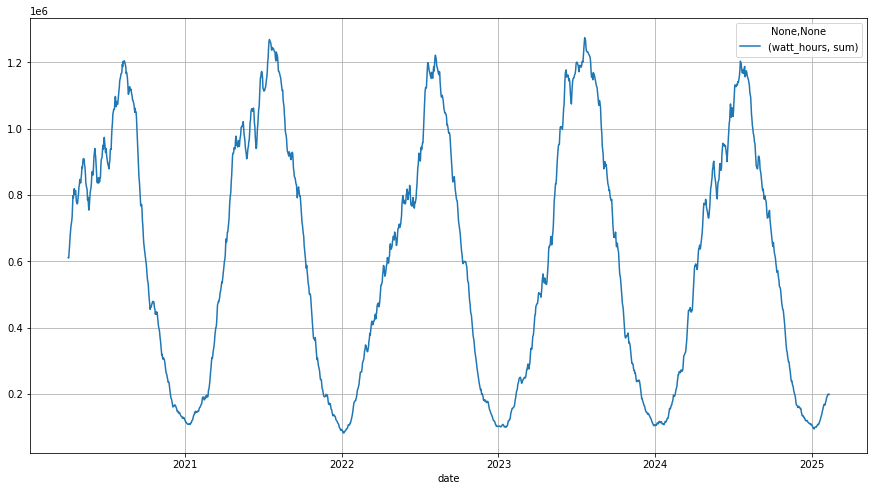

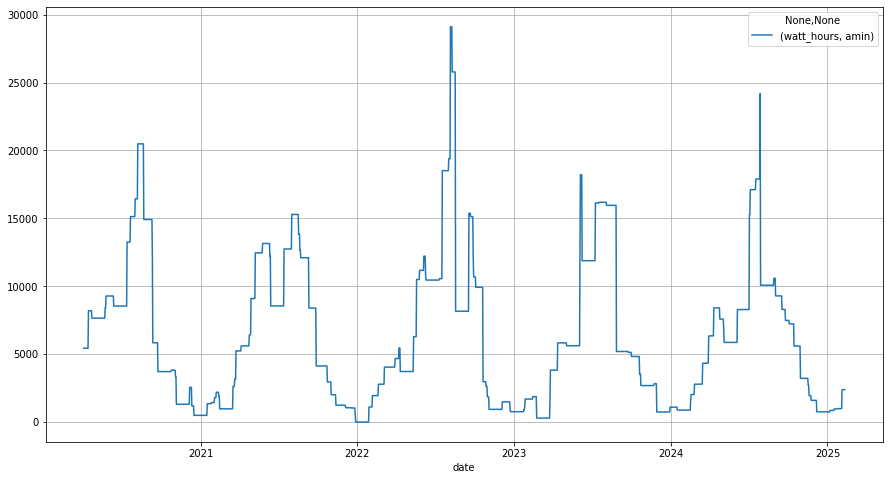

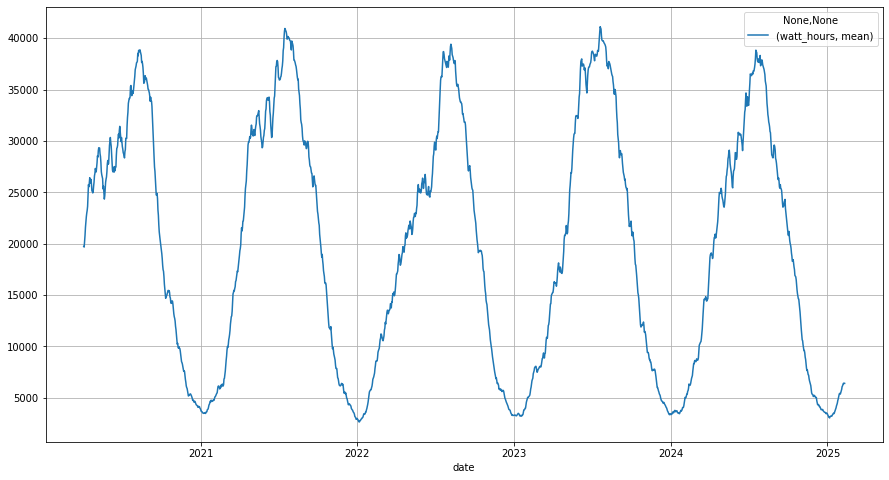

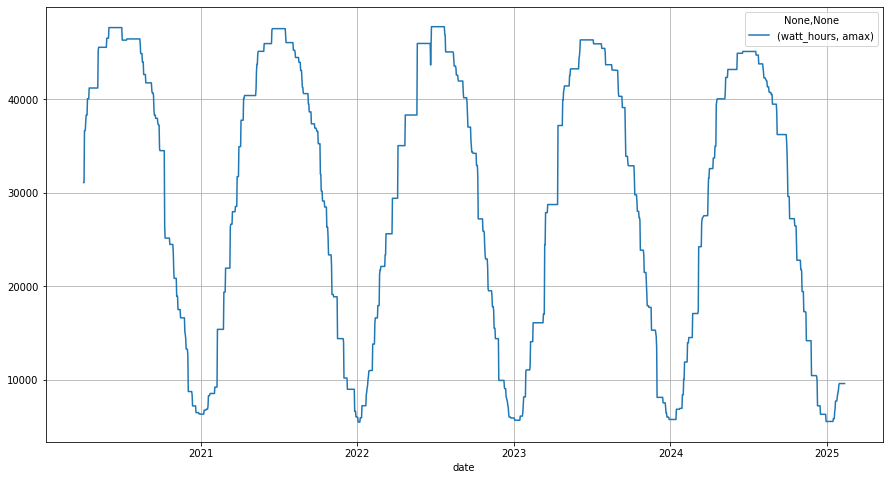

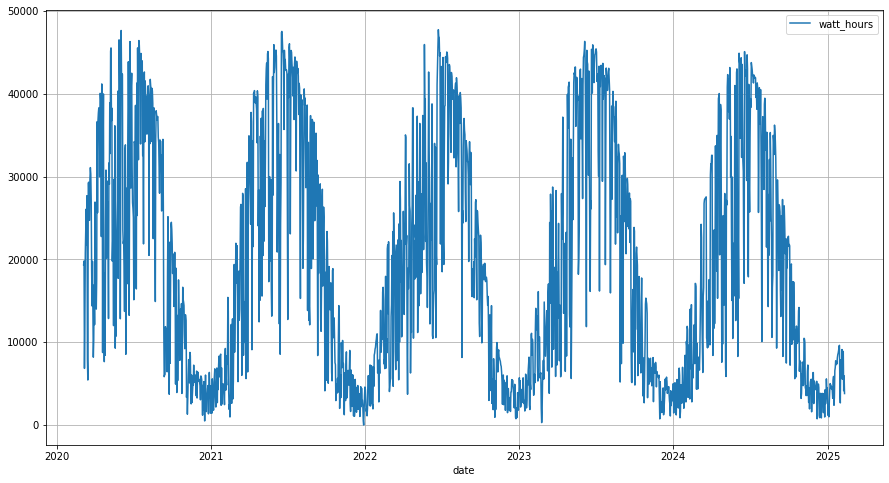

In [6]:
for flea in [12, 9, 4, 10, 11, 0, 1, 3]:
    print('+++++++++++++++++')
    print('flea:', flea)                
    print('+++++++++++++++++')
    slap(flea)

In [7]:
ord('v') - ord('r'), ord('k') - ord('g')

(4, 4)

<AxesSubplot:xlabel='time'>

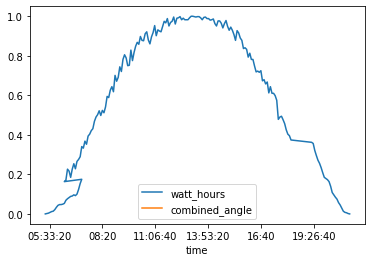

In [8]:
col = e.combined
angle_date = current_summer_solstice
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

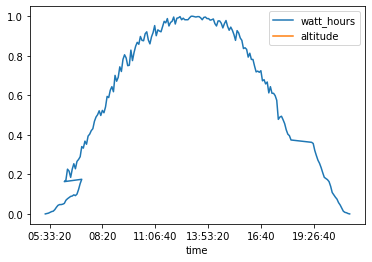

In [9]:
col = e.alt
angle_date = current_summer_solstice
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

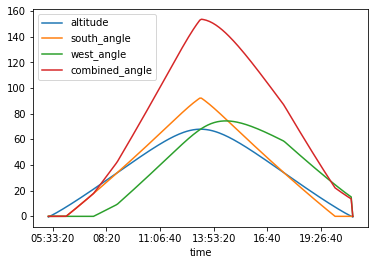

In [10]:
angle_date = current_summer_solstice - timedelta(days=days)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [11]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, current_summer_solstice, current_summer_solstice).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

                watt_hours
time                      
05:20:00-07:00           0
05:25:00-07:00           1
05:30:00-07:00           2
05:35:00-07:00           4
05:40:00-07:00           6
...                    ...
21:00:00-07:00           7
21:05:00-07:00           4
21:10:00-07:00           3
21:15:00-07:00           1
21:20:00-07:00           0

[193 rows x 1 columns]
Empty DataFrame
Columns: [combined_angle]
Index: []
                watt_hours  combined_angle
time                                      
05:20:00-07:00           0             NaN
05:25:00-07:00           1             NaN
05:30:00-07:00           2             NaN
05:35:00-07:00           4             NaN
05:40:00-07:00           6             NaN
05:45:00-07:00           7             NaN
05:50:00-07:00          11             NaN
05:55:00-07:00          17             NaN
06:00:00-07:00          22             NaN
06:05:00-07:00          24             NaN
06:10:00-07:00          24             NaN
06:15:00-07:00

In [12]:
angle_date = current_summer_solstice
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

combined_angle    0.0
dtype: float64


In [13]:
data.groupby(e.t)[e.wh].max().sum()

56840

In [14]:
data

,date,time,date_time,watts,watt_hours,forward,backward,peak,altitude,azimuth,south_angle,west_angle,combined_angle
0,2020-03-04,06:20:00-08:00,2020-03-04 06:20:00-08:00,1,0,0,19355,0,-15.221710,83.163782,0.000000,0.000000,0.000000
1,2020-03-04,06:25:00-08:00,2020-03-04 06:25:00-08:00,1,0,0,19355,0,-14.349954,84.080250,0.000000,0.000000,0.000000
2,2020-03-04,06:30:00-08:00,2020-03-04 06:30:00-08:00,1,0,0,19355,0,-13.476759,84.991698,0.000000,0.000000,0.000000
3,2020-03-04,06:35:00-08:00,2020-03-04 06:35:00-08:00,1,0,0,19355,0,-12.602350,85.898590,0.000000,0.000000,0.000000
4,2020-03-04,06:40:00-08:00,2020-03-04 06:40:00-08:00,1,0,0,19355,0,-11.726952,86.801398,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263215,2025-02-10,11:05:00-08:00,2025-02-10 11:05:00-08:00,1740,145,3407,529,0,22.604639,143.051783,37.119794,12.495476,48.365723
263216,2025-02-10,11:10:00-08:00,2025-02-10 11:10:00-08:00,1740,145,3552,384,0,23.124060,144.239894,37.964286,13.339968,49.970258
263217,2025-02-10,11:15:00-08:00,2025-02-10 11:15:00-08:00,1740,145,3697,239,0,23.628734,145.440081,38.797336,14.173018,51.553052
263218,2025-02-10,11:20:00-08:00,2025-02-10 11:20:00-08:00,1128,94,3791,94,0,24.118286,146.652317,39.618560,14.994242,53.113378
